# Import Libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from matplotlib.pyplot import cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from datetime import datetime, timedelta
from IPython import display
import time
from matplotlib.animation import FuncAnimation
from IPython.display import Video, HTML
import random

In [ ]:
dat = pd.read_csv('/content/HOT297_2000pts_hourly_3param.csv')
dat['DateTime'] = pd.to_datetime(dat['DateTime'])

datt = pd.read_csv('/content/HOT297_10000pts_hourly_3param.csv')
datt['DateTime'] = pd.to_datetime(datt['DateTime'])

# subsample
# don't use np.random since it's a time series data
N = 10000
dat_small = dat.iloc[0:N, :]
datt_small = datt.iloc[0:N, :]

In [ ]:
x = np.log10(np.array(dat_small['fsc_small']))
y = np.log10(np.array(dat_small['pe']))
z = np.log10(np.array(dat_small['chl_small']))

# Spectral Clustering

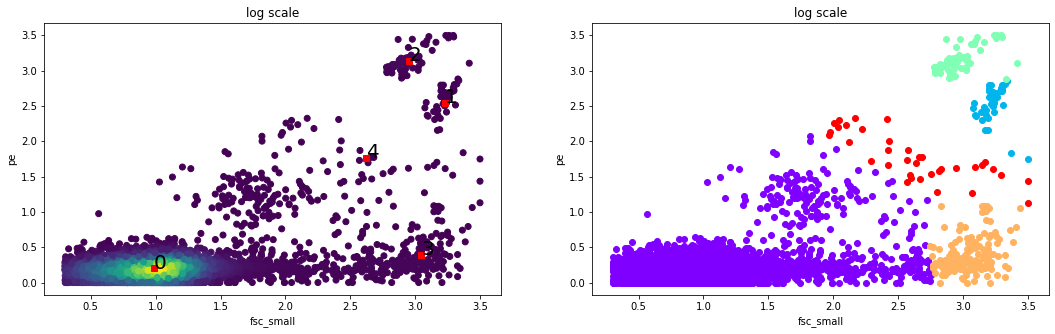

In [ ]:
K = 5
sc = SpectralClustering(K)
xy_new = np.stack([x,y], axis = 1)
labels = sc.fit_predict(xy_new)

x_mean,y_mean=[], []
xy = np.vstack([x,y])
density = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(1, 2, figsize = (18, 5), gridspec_kw={'wspace':0.2, 'hspace':0.7})
path_color = cm.rainbow(np.linspace(0, 1, K))
for i in range(K):
  ind = np.where(labels == i)
  ax[1].scatter(x[ind], y[ind], color = path_color[i])
  x_mean.append(np.mean(x[ind]))
  y_mean.append(np.mean(y[ind]))
ax[1].set_xlabel("fsc_small")
ax[1].set_ylabel("pe")
ax[1].set_title("log scale")

ax[0].scatter(x, y, c = density)
for k in range(K):
    ax[0].plot(x_mean[k],y_mean[k],'rs',markersize=6)
    ax[0].annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20) 
ax[0].set_xlabel('fsc_small')
ax[0].set_ylabel('pe')
ax[0].set_title("log scale")
#ax[0].colorbar()
plt.show()

# K-means

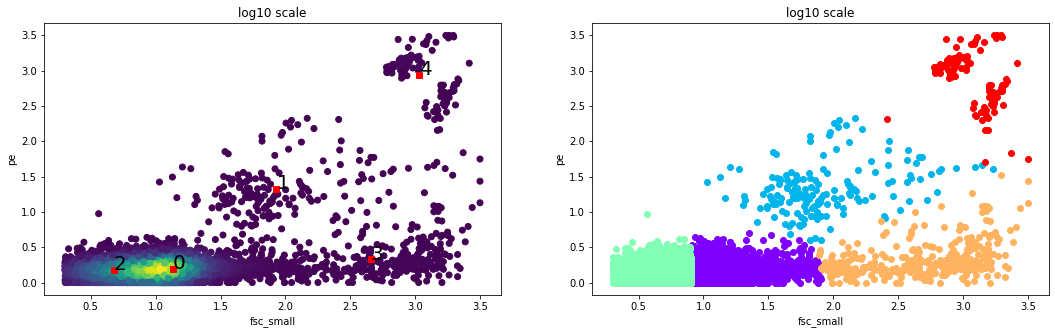

In [ ]:
K = 5
kmeans = KMeans(K)
xy_new = np.stack([x,y], axis = 1)
labels = kmeans.fit_predict(xy_new)
x_mean, y_mean = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

xy = np.vstack([x,y])
density = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(1, 2, figsize = (18, 5), gridspec_kw={'wspace':0.2, 'hspace':0.7})
ax[0].scatter(x, y, c = density)
for k in range(K):
    ax[0].plot(x_mean[k],y_mean[k],'rs',markersize=6)
    ax[0].annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20) 
ax[0].set_xlabel('fsc_small')
ax[0].set_ylabel('pe')
ax[0].set_title("log10 scale")

path_color = cm.rainbow(np.linspace(0, 1, K))
for i in range(K):
  ind = np.where(labels == i)
  ax[1].scatter(x[ind], y[ind], color = path_color[i])
ax[1].set_xlabel("fsc_small")
ax[1].set_ylabel("pe")
ax[1].set_title("log10 scale")

plt.show()

# Gaussian Mixture Model

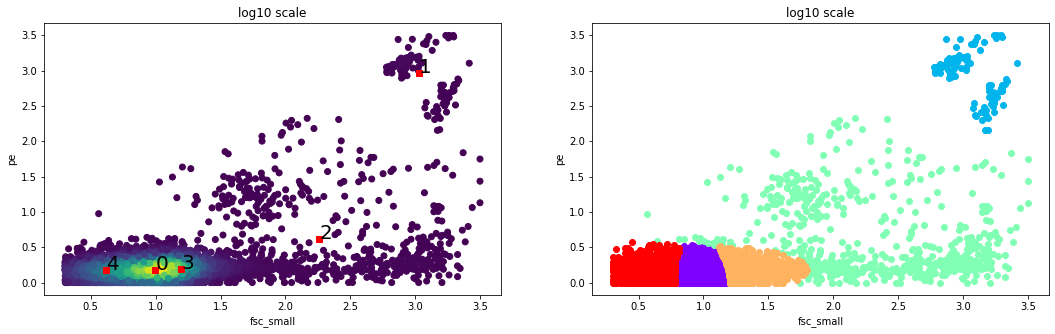

In [ ]:
K = 5
gmm = GaussianMixture(K)
xy_new = np.stack([x,y], axis = 1)
labels = gmm.fit_predict(xy_new)
x_mean,y_mean=gmm.means_[:,0],gmm.means_[:,1]

xy = np.vstack([x,y])
density = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(1, 2, figsize = (18, 5), gridspec_kw={'wspace':0.2, 'hspace':0.7})
ax[0].scatter(x, y, c = density)
for k in range(K):
    ax[0].plot(x_mean[k],y_mean[k],'rs',markersize=6)
    ax[0].annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20) 
ax[0].set_xlabel('fsc_small')
ax[0].set_ylabel('pe')
ax[0].set_title("log10 scale")

path_color = cm.rainbow(np.linspace(0, 1, K))
for i in range(K):
  ind = np.where(labels == i)
  ax[1].scatter(x[ind], y[ind], color = path_color[i])
ax[1].set_xlabel("fsc_small")
ax[1].set_ylabel("pe")
ax[1].set_title("log10 scale")

plt.show()

# Agglomerative Method

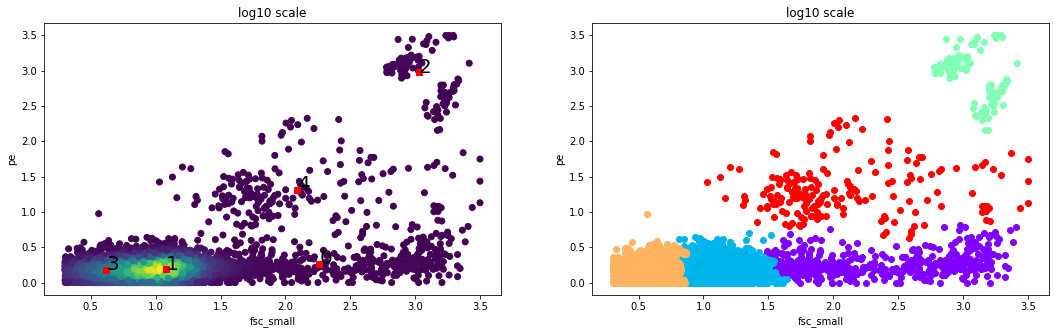

In [ ]:
K = 5
agg = AgglomerativeClustering(K)
xy_new = np.stack([x,y], axis = 1)
labels = agg.fit_predict(xy_new)
x_mean,y_mean=[], []
xy = np.vstack([x,y])
density = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(1, 2, figsize = (18, 5), gridspec_kw={'wspace':0.2, 'hspace':0.7})
path_color = cm.rainbow(np.linspace(0, 1, K))
for i in range(K):
  ind = np.where(labels == i)
  ax[1].scatter(x[ind], y[ind], color = path_color[i])
  x_mean.append(np.mean(x[ind]))
  y_mean.append(np.mean(y[ind]))
ax[1].set_xlabel("fsc_small")
ax[1].set_ylabel("pe")
ax[1].set_title("log10 scale")

ax[0].scatter(x, y, c = density)
for k in range(K):
    ax[0].plot(x_mean[k],y_mean[k],'rs',markersize=6)
    ax[0].annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20) 
ax[0].set_xlabel('fsc_small')
ax[0].set_ylabel('pe')
ax[0].set_title("log10 scale")

plt.show()

# GMM with Initial Centroids & Prob

In [ ]:
ind = []
dense_ind = (x<1.5)&(y<0.5)
x_dense = x[dense_ind]
y_dense = y[dense_ind]
for i in range(len(x_dense)):
  g1 = set(np.where(x==x_dense[i])[0])
  g2 = set(np.where(y==y_dense[i])[0])
  ind_temp = g1.intersection(g2).pop()
  ind.append(ind_temp)
less_dense_ind = np.random.choice(ind, 1000, replace = False)
not_dense_ind = list(set([i for i in range(len(x))])-set(ind))
x = np.hstack((x[less_dense_ind], x[not_dense_ind]))
y = np.hstack((y[less_dense_ind], y[not_dense_ind]))

In [ ]:
ind1 = (x>1.5) & (x<2) & (y>1) & (y<1.5)
x1 = x[ind1][int(len(x[ind1])/2)]
y1 = y[ind1][int(len(x[ind1])/2)]
ind2 = (x>2.7) & (x<3.2) & (y>3) & (y<3.5)
x2 = x[ind2][int(len(x[ind2])/2)]
y2 = y[ind2][int(len(x[ind2])/2)]
ind3 = (x>3) & (x<3.5) & (y>2.5) & (y<3)
x3 = x[ind3][int(len(x[ind3])/2)]
y3 = y[ind3][int(len(x[ind3])/2)]
ind4 = (x>2.5) & (x<3.5) & (y>0) & (y<0.5)
x4 = x[ind4][int(len(x[ind4])/2)]
y4 = y[ind4][int(len(x[ind4])/2)]
ind5 = (x>0) & (x<2) & (y>0) & (y<0.5)
x5 = x[ind5][int(len(x[ind5])/2)]
y5 = y[ind5][int(len(x[ind5])/2)]
init_cen = np.stack([[x1,y1], [x2,y2], [x3,y3], [x4,y4], [x5,y5]])

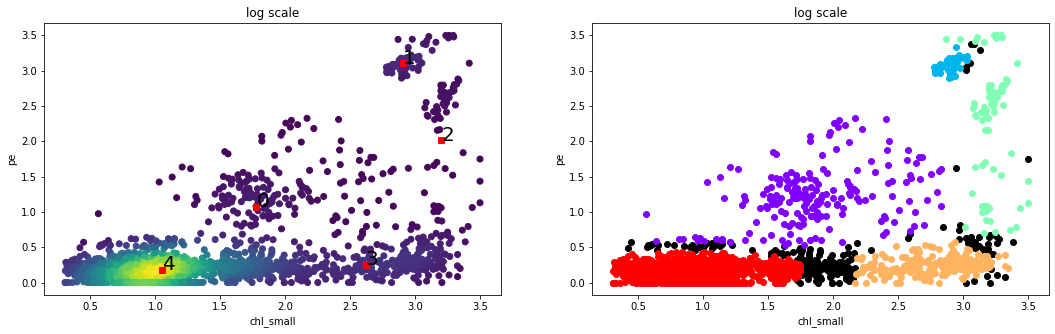

In [ ]:
K = 5
gmm = GaussianMixture(K, means_init = init_cen)
xy_new = np.stack([x,y], axis = 1)
labels = gmm.fit_predict(xy_new)
x_mean,y_mean=gmm.means_[:,0],gmm.means_[:,1]
prob = gmm.predict_proba(xy_new)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(1, 2, figsize = (18, 5), gridspec_kw={'wspace':0.2, 'hspace':0.7})
ax[0].scatter(x, y, c = z)
for k in range(K):
    ax[0].plot(x_mean[k],y_mean[k],'rs',markersize=6)
    ax[0].annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20)
ax[0].set_xlabel('chl_small')
ax[0].set_ylabel('pe')
ax[0].set_title("log scale")


thres = 0.88
path_color = cm.rainbow(np.linspace(0, 1, K))

for i in range(K):
  ind = np.where(labels == i)[0]
  p = prob[ind][:,i]
  new_ind = ind[np.where(p>thres)[0]]
  b_ind = list(set(ind)-set(new_ind))
  ax[1].scatter(x[b_ind], y[b_ind], color = "black")
  ax[1].scatter(x[new_ind], y[new_ind], color = path_color[i])

ax[1].set_xlabel("chl_small")
ax[1].set_ylabel("pe")
ax[1].set_title("log scale")

plt.show()

# Density Plots

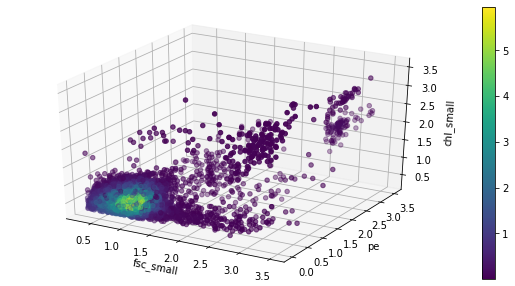

In [ ]:
xyz = np.vstack([x,y,z])
density = gaussian_kde(xyz)(xyz)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
scat=ax.scatter(x, y, z, c=density)
ax.set_xlabel('fsc_small')
ax.set_ylabel('pe')
ax.set_zlabel('chl_small')
plt.colorbar(scat)

plt.show()

In [ ]:
def movie(dat):
  start_time = dat['DateTime'][0]#+timedelta(hours=20)
  end_time = start_time + timedelta(hours=1)
  # tdif = dat['DateTime'][len(dat['DateTime'])-1] - dat['DateTime'][0]
  # total_hour = tdif.days*24+tdif.seconds/3600

  for j in range(20):
    fig, ax = plt.subplots(1, 3, figsize = (18, 5), gridspec_kw={'wspace':0.2, 'hspace':0.7})
    ind = (dat['DateTime'] < end_time) & (dat['DateTime'] >= start_time)
    x = np.log10(dat['fsc_small'][ind])
    y = np.log10(dat['pe'][ind])
    z = np.log10(dat['chl_small'][ind])

    xyz = np.vstack([x,y,z])
    density = gaussian_kde(xyz)(xyz)

    start_time = end_time
    end_time = start_time + timedelta(hours=1)

    g1 = ax[0].scatter(x, y, c = density)
    plt.colorbar(g1, ax=ax[0])
    ax[0].set_xlabel('fsc_small')
    ax[0].set_ylabel('pe')

    g2 = ax[1].scatter(x, z, c = density)
    plt.colorbar(g2, ax=ax[1])
    ax[1].set_xlabel('fsc_small')
    ax[1].set_ylabel('chl_small')

    g3 = ax[2].scatter(z, y, c = density)
    plt.colorbar(g3, ax=ax[2])
    ax[2].set_xlabel('chl_small')
    ax[2].set_ylabel('pe')

    display.display(plt.gcf()); plt.clf()
        
    display.clear_output(wait=True)

    time.sleep(0.01)

movie(dat)